### Task1: Load and prepare dataset (heart disease dataset)

In [ ]:
!pip install kagglehub

In [ ]:
!pip install scikit-learn


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alexteboul/heart-disease-health-indicators-dataset")

print("Path to dataset files:", path)

100%|██████████| 2.66M/2.66M [00:05<00:00, 502kB/s]

Extracting files...
Path to dataset files: C:\Users\HP\.cache\kagglehub\datasets\alexteboul\heart-disease-health-indicators-dataset\versions\3


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
df=pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [352]:
data={}
# binary features of HighBP, HighChol and Stroke are chosen
data['data']=df
# binary label respresenting heart disease is chose
data['label']=df[['HeartDiseaseorAttack']]

In [353]:
## scale age
scaler=StandardScaler()
data['data']['Age'] = scaler.fit_transform(data['data'][['Age']])


In [354]:
print(data['data'][:5])
print(data['label'][:5])

   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex       Age  Educatio

In [355]:
X_train,X_test,y_train,y_test=train_test_split(data['data'],data['label'],test_size=0.10,shuffle=True)
print(f"training examples: {len(X_train)}")
print(f"test examples: {len(X_test)}")

training examples: 228312
test examples: 25368


In [356]:
train_df=pd.concat([X_train,y_train],axis=1)
test_df=pd.concat([X_test,y_test],axis=1)

In [357]:
train_df[:5]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
176010,0.0,0.0,0.0,1.0,29.0,1.0,0.0,2.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.971733,5.0,6.0,0.0
115805,0.0,0.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,1.0,...,0.0,5.0,5.0,28.0,1.0,0.0,0.644317,6.0,8.0,0.0
138384,0.0,0.0,0.0,0.0,26.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,-0.337933,6.0,6.0,0.0
25132,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,0.0,3.0,0.0,0.0,0.0,0.0,-1.320182,3.0,4.0,0.0
54626,0.0,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,-0.010516,4.0,8.0,0.0


In [358]:
test_df[:5]

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,HeartDiseaseorAttack
104485,0.0,0.0,0.0,0.0,24.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,-1.320182,6.0,8.0,0.0
191867,0.0,1.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,1.0,3.0,0.0,0.0,0.0,1.0,0.316900,4.0,7.0,0.0
104054,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,15.0,0.0,0.0,0.0,-1.647599,6.0,7.0,0.0
227475,0.0,1.0,1.0,1.0,38.0,1.0,0.0,2.0,1.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,0.644317,5.0,7.0,0.0
180708,0.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,1.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,-0.010516,4.0,6.0,0.0


In [359]:
train_df.to_csv('train.csv')
test_df.to_csv('test.csv')

In [360]:
## convert dataframes to numpy array
X_train=train_df.iloc[:,[0,1,2]].to_numpy()
y_train=train_df.iloc[:,3].to_numpy()
X_test=test_df.iloc[:,[0,1,2]].to_numpy()
y_test=test_df.iloc[:,3].to_numpy()

tr

In [361]:
print(type(X_train))
print(X_train.shape)

<class 'numpy.ndarray'>
(228312, 3)


In [362]:
print(type(y_train))
print(y_train.shape)

<class 'numpy.ndarray'>
(228312,)


### Task 2: Sigmoid Activation

In [6]:
def sigmoid(z):
    ''' 
    args:
     z - scalar or numpy array (m,) 

    returns:
     sigmoid - scalar or numpy array (m,)
    '''
    z = np.clip(z, -500, 500)  # Prevent overflow
    return 1/(1 + np.exp(-z))

    

In [364]:
arr=np.arange(5)
print(sigmoid(arr))

[0.5        0.73105858 0.88079708 0.95257413 0.98201379]


### Task 3: Cost Function

In [5]:
def cost_function(X,y,W):
    ''' 
    args:
    
    - X all examples + bias term of shape (m,1+n)
    - y target labels (m,1)
    - W weight vector of shape (1+n,1)
    
    returns:
    - loss (scalar)
    '''

    # Ensure W is a column vector
    if W.shape[1] != 1:
        W = W.reshape(-1, 1)
        
    z=X@W
    f_x=sigmoid(z) # shape = (m,)

    # Prevent log(0) errors
    epsilon = 1e-9  
    f_x = np.clip(f_x, epsilon, 1 - epsilon)  

    cost=-y*np.log(f_x)-(1-y)*np.log(1-f_x)
    cost=np.mean(cost)
    return cost



In [372]:
cost_function(X_train,y_train,weights)

18.430924039288303

### Task 4: Gradient Descent

In [9]:
def compute_gradient(X,y,W):
    '''
    Calculates the gradient of cost wrt to each weight element

    Args:
    - X training examples (m,n+1)
    - y lables (m,1)
    - W (n+1,1)

    returns:
    - dj_dw shape (n+1,1) 
    '''
    m=X.shape[0]
    z=X@W
    f_x=sigmoid(z) # (m,1)
    loss=f_x-y
    dj_dw=(loss.T @ X)*(1/m)
    return dj_dw.T


def gradient_descent(X,y,W,alpha,num_iters):
    for i in range(num_iters):
        dj_dw=compute_gradient(X,y,W)
        W=W-alpha*dj_dw

        
    return W

In [381]:
weights=gradient_descent(X_train,y_train,weights,0.01,1000)

cost at 1 iter: 0.05601737184405987
cost at 11 iter: 0.028455134948220294
cost at 21 iter: 0.028126264002194045
cost at 31 iter: 0.02805803495284827
cost at 41 iter: 0.02800225322008117
cost at 51 iter: 0.02795223560793333
cost at 61 iter: 0.027906205512389176
cost at 71 iter: 0.027863037049547883
cost at 81 iter: 0.02782197561038017
cost at 91 iter: 0.027782504809890904
cost at 101 iter: 0.027744263813047874
cost at 111 iter: 0.027706995034950672
cost at 121 iter: 0.027670510678055774
cost at 131 iter: 0.027634671047201475
cost at 141 iter: 0.027599370290818496
cost at 151 iter: 0.02756452686937316
cost at 161 iter: 0.027530077066381706
cost at 171 iter: 0.027495970483012055
cost at 181 iter: 0.027462166845191486
cost at 191 iter: 0.027428633693902617
cost at 201 iter: 0.027395344680918476
cost at 211 iter: 0.02736227828790154
cost at 221 iter: 0.027329416847672858
cost at 231 iter: 0.02729674578557642
cost at 241 iter: 0.02726425302429257
cost at 251 iter: 0.02723192851221248
cost at

In [7]:
# read csv
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')


## convert dataframes to numpy array
X_train=train_df.iloc[:,1:-1].to_numpy()
y_train=train_df.iloc[:,-1].to_numpy()
X_test=test_df.iloc[:,1:-1].to_numpy()
y_test=test_df.iloc[:,-1].to_numpy()

# concatenate bias term in X_train and X_test
ones=np.ones((X_train.shape[0],1)) # col of ones
X_train=np.hstack((ones,X_train))

ones=np.ones((X_test.shape[0],1))
X_test=np.hstack((ones,X_test))

# initialize weights
weights=np.random.randn(X_train.shape[1])
weights=weights.reshape(-1,1)
print(weights.shape)
print(X_test.shape)
print(X_train.shape)

y_test=y_test.reshape((-1,1))
y_train=y_train.reshape((-1,1))
print(y_test.shape)
print(y_train.shape)

(23, 1)
(25368, 23)
(228312, 23)
(25368, 1)
(228312, 1)


### Task 5: Training and Validation Implementation

Training with alpha = 0.001
Epoch 0: Train Loss = 1.6903742747296049, Val Loss = 1.7156980995444078, Precision = 0.04653349001174723, Recall = 0.24504950495039396
Epoch 10: Train Loss = 1.1164165792813927, Val Loss = 1.1370647955737785, Precision = 0.03223593964333968, Recall = 0.05816831683165917
Epoch 20: Train Loss = 1.030232142414035, Val Loss = 1.0495464621136485, Precision = 0.032206119162623614, Recall = 0.02475247524751454
Epoch 30: Train Loss = 1.007229542018924, Val Loss = 1.0261413597621187, Precision = 0.03637901861249037, Recall = 0.017739273927385422
Epoch 40: Train Loss = 0.9966770992704052, Val Loss = 1.0153565292527964, Precision = 0.03628601921020674, Recall = 0.01402640264025824
Epoch 50: Train Loss = 0.9895226439560818, Val Loss = 1.0080026451674675, Precision = 0.0353227771010532, Recall = 0.011963696369632027
Epoch 60: Train Loss = 0.9835015820661445, Val Loss = 1.00179265250686, Precision = 0.035386631716860566, Recall = 0.011138613861381543
Epoch 70: Train Loss 

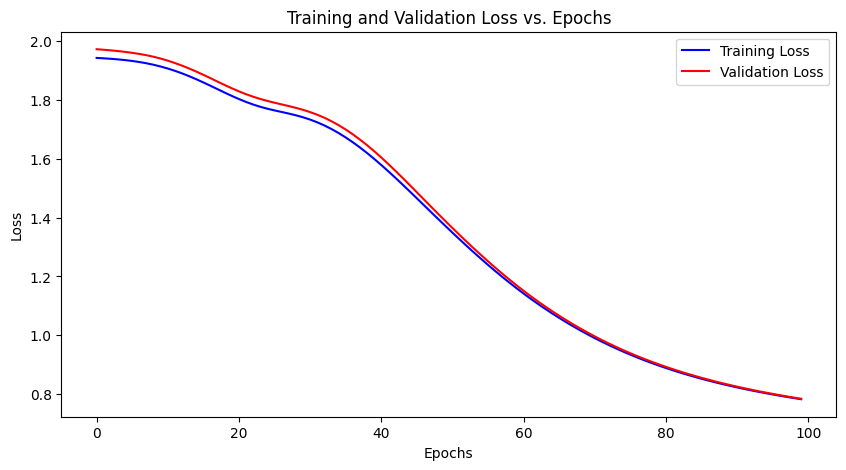

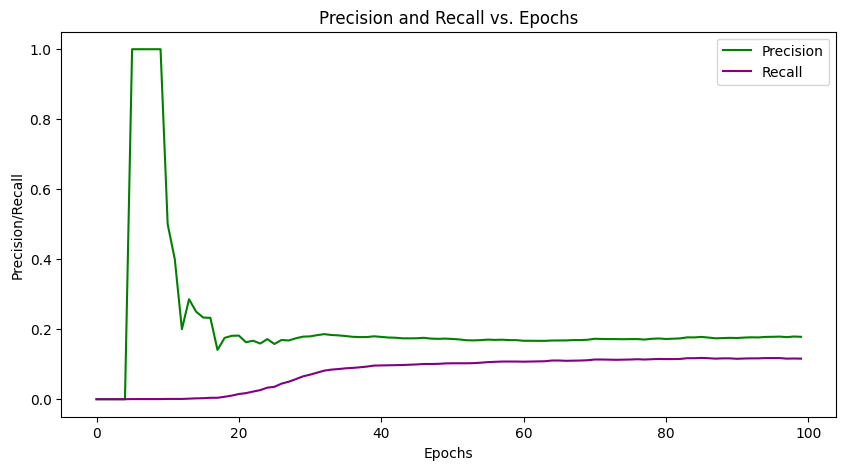

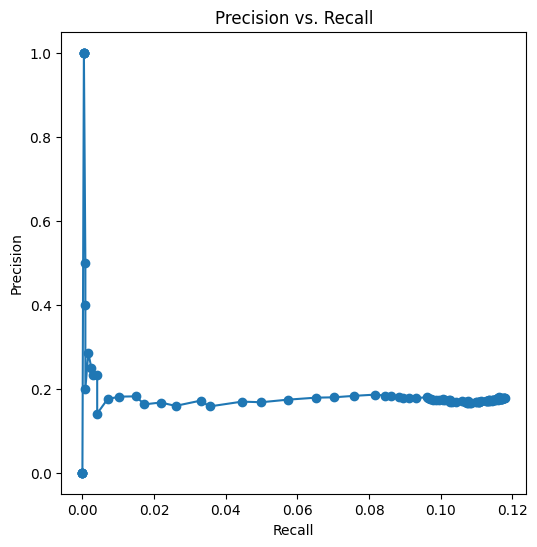

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compute_metrics(y_true, y_pred):
    y_pred_binary = (y_pred >= 0.5).astype(int)  # Convert probabilities to binary labels
    TP = np.sum((y_pred_binary == 1) & (y_true == 1))
    FP = np.sum((y_pred_binary == 1) & (y_true == 0))
    FN = np.sum((y_pred_binary == 0) & (y_true == 1))
    
    precision = TP / (TP + FP + 1e-9)  # Avoid division by zero
    recall = TP / (TP + FN + 1e-9)
    
    return precision, recall

# Hyperparameters
alpha_values = [0.001, 0.01, 0.1, 0.5]  # Learning rates to test
epochs = 100

# Lists to store results
best_alpha = None
best_val_loss = float('inf')
best_training_loss = []
best_validation_loss = []
best_precision = []
best_recall = []

for alpha in alpha_values:
    print(f"Training with alpha = {alpha}")
    
    # Initialize weights
    W = np.random.randn(X_train.shape[1], 1)
    
    training_loss = []
    validation_loss = []
    precision_values = []
    recall_values = []
    
    for epoch in range(epochs):
        # Training Step
        W = gradient_descent(X_train, y_train, W, alpha, num_iters=1)
        train_loss = cost_function(X_train, y_train, W)
        val_loss = cost_function(X_test, y_test, W)
        
        # Compute Precision and Recall
        y_pred_train = sigmoid(X_train @ W)
        y_pred_val = sigmoid(X_test @ W)
        precision, recall = compute_metrics(y_test, y_pred_val)
        
        # Store results
        training_loss.append(train_loss)
        validation_loss.append(val_loss)
        precision_values.append(precision)
        recall_values.append(recall)
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}: Train Loss = {train_loss}, Val Loss = {val_loss}, Precision = {precision}, Recall = {recall}")
    
    # Select best alpha based on validation loss
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_alpha = alpha
        best_training_loss = training_loss
        best_validation_loss = validation_loss
        best_precision = precision_values
        best_recall = recall_values

print(f"Best alpha: {best_alpha}")

# Plot 1: Training and Validation Loss vs. Epochs
plt.figure(figsize=(10,5))
plt.plot(range(epochs), best_training_loss, label='Training Loss', color='blue')
plt.plot(range(epochs), best_validation_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.show()

# Plot 2: Precision and Recall vs. Epochs
plt.figure(figsize=(10,5))
plt.plot(range(epochs), best_precision, label='Precision', color='green')
plt.plot(range(epochs), best_recall, label='Recall', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Precision/Recall')
plt.title('Precision and Recall vs. Epochs')
plt.legend()
plt.show()

# Plot 3: Precision vs. Recall
plt.figure(figsize=(6,6))
plt.plot(best_recall, best_precision, marker='o', linestyle='-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.show()


### Task 6: Prediction and Scatter Plot

In [11]:
import numpy as np

def predict(X, W):
    """
    Predict the class label (0 or 1) based on the learned weights.
    
    Args:
    - X: Input feature vector of shape (m, n+1) (including bias term)
    - W: Trained weight vector of shape (n+1, 1)
    
    Returns:
    - Predicted labels (m, 1), either 0 or 1
    """
    probabilities = sigmoid(X @ W)  # Get probabilities using sigmoid function
    return (probabilities >= 0.5).astype(int)  # Convert to 0 or 1 based on threshold

# Example test cases (randomly chosen rows from X_test)
sample_inputs = X_test[:3]  # Select first 3 test samples
predictions = predict(sample_inputs, weights)  # Use trained weights for prediction

print("Predictions:", predictions.flatten())  # Print predictions



Predictions: [1 1 1]


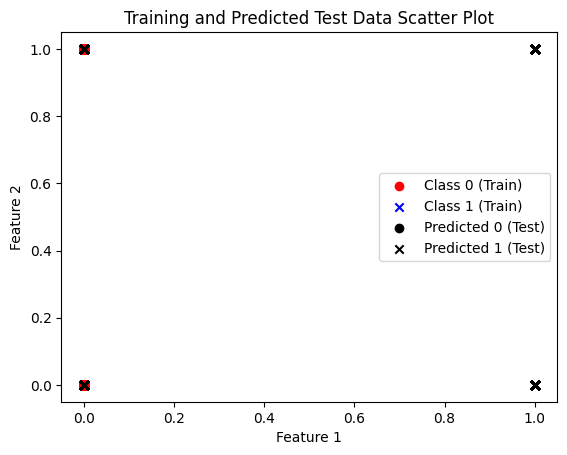

In [12]:
# create a scatter plot
import matplotlib.pyplot as plt

# Select two features for 2D visualization (e.g., first two columns)
X_train_plot = X_train[:, 1:3]  # Exclude bias term
y_train_plot = y_train.flatten()

X_test_plot = X_test[:, 1:3]
y_test_pred = predict(X_test, weights).flatten()

# Scatter plot for training data
plt.scatter(X_train_plot[y_train_plot == 0, 0], X_train_plot[y_train_plot == 0, 1], 
            c='red', marker='o', label='Class 0 (Train)')
plt.scatter(X_train_plot[y_train_plot == 1, 0], X_train_plot[y_train_plot == 1, 1], 
            c='blue', marker='x', label='Class 1 (Train)')

# Scatter plot for predicted test data
plt.scatter(X_test_plot[y_test_pred == 0, 0], X_test_plot[y_test_pred == 0, 1], 
            c='black', marker='o', label='Predicted 0 (Test)')
plt.scatter(X_test_plot[y_test_pred == 1, 0], X_test_plot[y_test_pred == 1, 1], 
            c='black', marker='x', label='Predicted 1 (Test)')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Training and Predicted Test Data Scatter Plot")
plt.legend()
plt.show()
